<a href="https://colab.research.google.com/github/raultyv/Machine_learning/blob/main/regresion_planta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerías básicas
import pandas as pd
import numpy as np
from google.colab import files
import io

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
uploaded = files.upload() # Esto abrirá una ventana para que selecciones el archivo
file_name = list(uploaded.keys())[0]
print("Archivo cargado:", file_name)

df = pd.read_excel(file_name)
df.head()



In [ ]:
## tratamiento de datos

## conversion de fechas
df['Real Diario'] = pd.to_datetime(df['Real Diario'])
df = df.sort_values('Real Diario').reset_index(drop=True)

#limpieza de columnas con %
def limpiar_porcentaje(col):
    return (
        col.astype(str)
           .str.replace('%', '', regex=False)
           .str.replace(',', '', regex=False)
           .astype(float)
    )

for col in df.columns:
    print(f"'{col}'")

df.columns = (
    df.columns
    .str.strip()              # quita espacios
    .str.replace('\n', ' ', regex=True)  # quita saltos de línea
    .str.replace('  ', ' ', regex=True)  # dobles espacios
)

df.columns.tolist()

# ejemplo (ajusta según lo que imprima df.columns)
percent_cols = [
    'Ley (%)',
    'Tox (%)',
    'Rec. (%)',
    'Rec Modelo (%)',
    'Grado Conc Filtrado (%)',
    '% Finos',
    'Stock Pile (%)',
    'Humedad de Concentrado (%)',
    'Disponibilidad Chancado (%)',
    'Uso de Disponibilidad Chancado (%)',
    'Disponibilidad Molienda (%)',
    'Uso de Disponibilidad Molienda (%)'
]

for col in percent_cols:
    if col in df.columns:
        df[col] = limpiar_porcentaje(df[col])
    else:
        print(f"⚠️ Columna no encontrada: {col}")

df.columns = (
    df.columns
      .str.strip()
      .str.replace('\n', ' ', regex=True)
      .str.replace('.', '', regex=False)
      .str.replace('%', ' %', regex=False)
      .str.replace('  ', ' ', regex=True)
)

def limpiar_porcentaje(col):
    return (
        col.replace('-', np.nan)
           .astype(str)
           .str.replace('%', '', regex=False)
           .str.strip()
           .replace('', np.nan)
           .astype(float)
    )

percent_cols = [
    'Ley %',
    'Tox %',
    'Rec %',
    'Rec Modelo %',
    'Grado Conc Filtrado %',
    '% Finos',
    'Stock Pile %',
    'Humedad de Concentrado %',
    'Disponibilidad Chancado %',
    'Uso de Disponibilidad Chancado %',
    'Disponibilidad Molienda %',
    'Uso de Disponibilidad Molienda %'
]

import numpy as np

for col in percent_cols:
    if col in df.columns:
        df[col] = limpiar_porcentaje(df[col])
    else:
        print(f"⚠️ Columna no encontrada: {col}")

import numpy as np

df.replace('-', np.nan, inplace=True)

df['Produccion'] = pd.to_numeric(df['Produccion'], errors='coerce')
df['Recuperacion'] = pd.to_numeric(df['Recuperacion'], errors='coerce')

print(df.columns.tolist())

df.columns = (
    df.columns
      .str.strip()               # elimina espacios
      .str.lower()               # minúsculas
      .str.normalize('NFKD')     # elimina tildes
      .str.encode('ascii', errors='ignore')
      .str.decode('utf-8')
      .str.replace(' ', '_')
)

print(df.columns)

df['produccion'] = pd.to_numeric(df['produccion'], errors='coerce')
df['recuperacion'] = pd.to_numeric(df['recuperacion'], errors='coerce')

df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
)

df['produccion']

print(list(df.columns))

df['Produccion']

df.columns

df_limpio = df.dropna()

cols_quimicas = ['brix', 'ph']  # usa los nombres reales
df[cols_quimicas] = df[cols_quimicas].fillna(df[cols_quimicas].median())

list(df.columns)

fecha_col = 'real_diario'
target = 'molido_(kt)'
cols_operacion = [
    'disponibilidad_chancado_(_%)',
    'uso_de_disponibilidad_chancado_(_%)',
    'disponibilidad_molienda_(_%)',
    'uso_de_disponibilidad_molienda_(_%)'
]
cols_metalurgicas = [
    'ley_(_%)',
    'tox_(_%)',
    'rec_(_%)',
    'rec_modelo_(_%)',
    '%finos'
]
cols_stockpile = [
    'stock_pile_(_%)',
    'tonelaje_stock_pile_(kt)'
]

def limpiar_porcentaje(col):
    return (
        col.astype(str)
        .str.replace('%','')
        .str.replace('-', '')
        .replace('', pd.NA)
        .astype(float)
    )

percent_cols = [c for c in df.columns if '(_%)' in c or c == '%finos']

for col in percent_cols:
    df[col] = limpiar_porcentaje(df[col])

df[target].isna().sum()
df = df.dropna(subset=[target])
df[cols_operacion] = df[cols_operacion].fillna(
    df[cols_operacion].median()
)



In [52]:
features_produccion = cols_operacion + cols_stockpile

X = df[features_produccion]
y = df[target]

X.info()
y.describe()

cols_stockpile = ['stock_pile_(_%)', 'tonelaje_stock_pile_(kt)']

df[cols_stockpile] = df[cols_stockpile].fillna(
    df[cols_stockpile].median()
)


split = int(len(df) * 0.8)

X_train = X.iloc[:split]
X_test  = X.iloc[split:]

y_train = y.iloc[:split]
y_test  = y.iloc[split:]

X.isna().sum()

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

pipeline_lr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('model', LinearRegression())
])

pipeline_lr.fit(X_train, y_train)

y_pred = pipeline_lr.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

coef = pd.Series(
    pipeline_lr.named_steps['model'].coef_,
    index=X.columns
).sort_values(ascending=False)

coef

# Exportar dataset limpio a Excel
output_path = 'dataset_produccion_limpio.xlsx'
df.to_excel(output_path, index=False)

output_path

df_modelo = df[X.columns.tolist() + [y.name]]

df_modelo.to_excel('dataset_modelo_produccion.xlsx', index=False)

df.describe().T



,count,mean,min,25%,50%,75%,max,std
real_diario,2330,2022-09-27 07:38:34.506437888,2019-06-01 00:00:00,2021-02-03 06:00:00,2022-10-13 12:00:00,2024-05-17 18:00:00,2025-12-21 00:00:00,NaN
chancado_(kt),2318.0,138.00976,0.0,131.714583,152.301501,164.500832,186.585592,43.755232
molido_(kt),2330.0,137.442215,0.0,137.703418,148.58684,154.959599,186.432916,34.943808
ley_(_%),2316.0,0.016858,0.0,0.005701,0.007265,0.008741,1.31,0.088196
tox_(_%),2316.0,0.203287,0.0,0.07318,0.090925,0.112097,13.618,0.997591
rec_(_%),2314.0,1.953972,0.0,0.846758,0.873752,0.896017,91.18,9.678456
rec_modelo_(_%),2308.0,1.997677,0.0,0.854991,0.875261,0.892238,90.36,9.855444
cu_fino_recuperado_(t),2329.0,891.9505,0.0,662.687929,891.94413,1131.792,2086.004,357.432591
cu_fino_filtrado_(t),2330.0,890.10194,0.0,673.488729,894.7155,1128.245017,2069.331,358.071677
grado_conc_filtrado_(_%),2318.0,0.808999,0.0,0.294077,0.324535,0.355928,41.854,4.300247


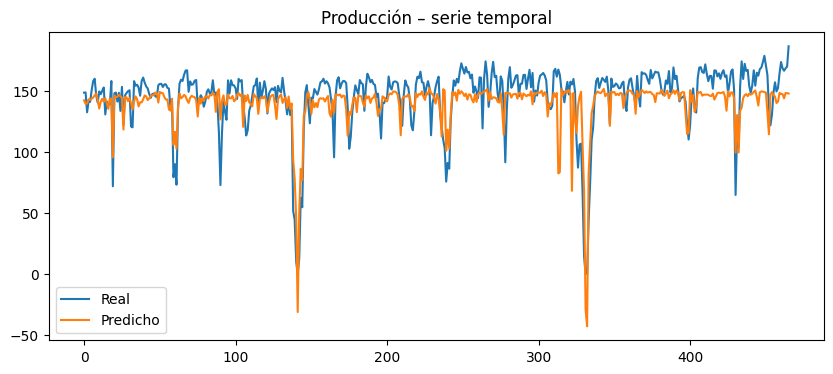

In [58]:
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)
import numpy as np

y_pred = pipeline_lr.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

#ERROR RELATIVO
mape = np.mean(
    np.abs((y_test - y_pred) / np.where(y_test == 0, np.nan, y_test))
) * 100

print("MAPE (%):", mape)
#3< 10 % → excelente
#10–15 % → bueno
#20 % → revisar proceso

#validacion operacional
df_eval = X_test.copy()
df_eval['real'] = y_test.values
df_eval['pred'] = y_pred

df_eval['error'] = df_eval['pred'] - df_eval['real']

df_eval.groupby(
    pd.cut(df_eval['real'], bins=5)
)['error'].agg(['mean', 'std', 'count'])

#diagnostico visual
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Real (kt)")
plt.ylabel("Predicho (kt)")
plt.title("Producción real vs predicha")
plt.show()

#residuales
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0)
plt.xlabel("Predicho")
plt.ylabel("Residual")
plt.title("Residual vs Predicción")
plt.show()

#validacion temporal
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicho')
plt.legend()
plt.title("Producción – serie temporal")
plt.show()
